# Importing Libraries

Importing the libraries that will be used in the procedures below

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

import mlflow
import mlflow.sklearn

from sklearn.metrics import accuracy_score, \
                            recall_score, \
                            f1_score, \
                            precision_score, \
                            confusion_matrix, \
                            RocCurveDisplay, \
                            PrecisionRecallDisplay, \
                            ConfusionMatrixDisplay

# Importing Dataset

Using pandas read_csv function to load the dataset used in this work

In [2]:
df = pd.read_csv('Credit.csv')
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


# Using info and is null function

In order to discover  number of entries, datatype, columns quantity and columns with no data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [4]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

# Unique Values

Check the unique values in order to see if there is any "High Cardinality" in the columns

In [5]:
df.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

The columns Date seems to have 'High Cardinality' and it will be checked

# Columns

Dataset list of columns

In [6]:
#Numerical columns

numerical = df.select_dtypes(include=['int64']).columns
numerical

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

In [7]:
#Categorical columns

categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

# Defining variables X, y (independent and dependent)

Creating the objects the will contain the inputs and targets

In [8]:
X = df.drop(['class'], axis=1)
y = df['class']

X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

# Spliting the dataset in train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline: definition of columns and features used in the steps

In both numerical and categorical data

In [10]:
#Numerical Transfomation Pipelines

#All columns = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
num_features = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

#Using method SimpleImputer to fill the empty numerical spaces with the medin
num_transform = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

In [11]:
#Categorical Transformation Pipelines
cat_features = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']

#cat_features = 
cat_transform = Pipeline(steps=[('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'))])

# Pipeline preprocessor

Creating the object used in the model function

In [12]:
#Componding the preprocessors
preprocessor = ColumnTransformer(transformers=[('num', num_transform, num_features), ('cat', cat_transform, cat_features)], remainder='passthrough')

# Starting MLflow

In [13]:
#Setting the experiment
mlflow.set_experiment('credit')    

<Experiment: artifact_location='file:///C:/Users/felip/DSprojects/credit/mlruns/881414482809066118', creation_time=1719374589810, experiment_id='881414482809066118', last_update_time=1719374589810, lifecycle_stage='active', name='credit', tags={}>

# Creating the model

Training and evaluating the model while input data on MLflow

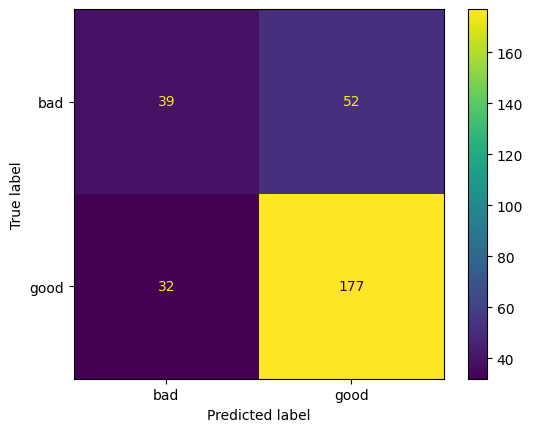

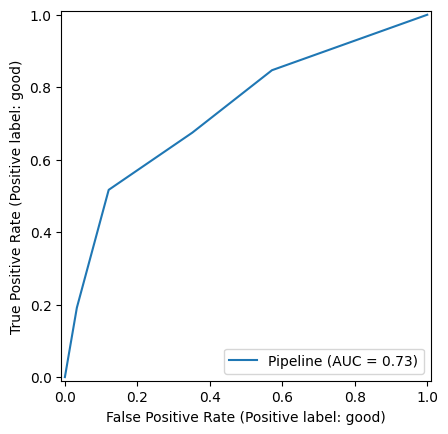

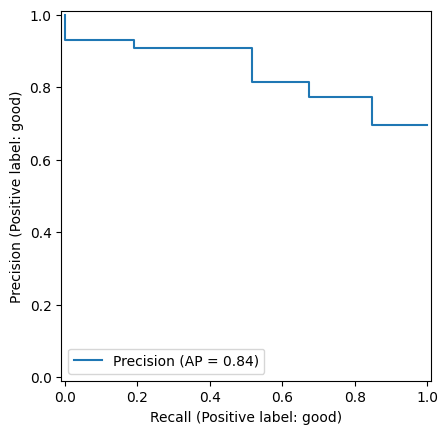

In [14]:
#Model parameters
max_depth = 7
random_state = 42
min_sample_split = 100
min_sample_leaf = 100
criterion = 'gini'

with mlflow.start_run():
    
    #Model
    model_pipe = Pipeline(steps=[('preprocessor', preprocessor), \
                             ('tree', DecisionTreeClassifier(max_depth=max_depth, \
                                                        random_state=random_state, \
                                                        min_samples_split=min_sample_split, \
                                                        min_samples_leaf=min_sample_leaf, \
                                                        criterion=criterion
                                                       ))])
    #Creating parameters for MLflow
    mlflow.log_param('max_depth', max_depth)
    mlflow.log_param('random_state', random_state)
    mlflow.log_param('min_sample_split', min_sample_split)
    mlflow.log_param('min_sample_leaf', min_sample_leaf)
    mlflow.log_param('criterion', criterion)
    mlflow.log_param('num_features', num_features)
    mlflow.log_param('cat_features', cat_features)
    
    #Fitting model and predictor
    model_pipe.fit(X_train, y_train)
    predictor = model_pipe.predict(X_test)
     

    #Evaluation metrics
    model_score = model_pipe.score(X_train, y_train)
    accuracy_score = accuracy_score(y_test, predictor)
    precision_score = precision_score(y_test, predictor, average='macro')
    recall_score = recall_score(y_test, predictor, average='macro')
    f1_score = f1_score(y_test, predictor, average='macro')
 
       
    #Metrics for MLflow
    mlflow.log_metric('model_score', model_score)
    mlflow.log_metric('accuracy_score', accuracy_score)
    mlflow.log_metric('precision_score', precision_score)
    mlflow.log_metric('recall_score', recall_score)
    mlflow.log_metric('f1_score', f1_score)
 
    
    #Confusion Matrix
    
    #conf_matrix = confusion_matrix(y_test, predictor)
    conf_matrix_chart = ConfusionMatrixDisplay.from_estimator(model_pipe, X_test, y_test)
    conf_matrix_chart.figure_.savefig('Conf_Matrix.png') #save as png
    
    #Confusion Matrix MLflow artifact
    mlflow.log_artifact('Conf_Matrix.png')
    
    #Roc-auc curve chart
    roc = RocCurveDisplay.from_estimator(model_pipe, X_test, y_test)
    roc.figure_.savefig('ROC-Curve.png') #save chart as png
    
    #Roc-auc curve MLflow artifact
    mlflow.log_artifact("ROC-Curve.png")
    
    #Precision Recall chart
    precision_recall = PrecisionRecallDisplay.from_estimator(model_pipe, X_test, y_test, name="Precision")
    precision_recall.figure_.savefig('Precision-Recall.png') #save chart as png
        
    #Precision Recall MLflow artifact
    mlflow.log_artifact("Precision-Recall.png")
    
    #Logging model to MLFlow
    mlflow.sklearn.log_model(model_pipe, 'model')